In [10]:
import networkx as nx
import numpy as np
import fugu
from fugu import Scaffold, Brick, Spike_Input

In [17]:
class XOR(Brick):
    """n bit XOR function. """
    
    def __init__(self, name=None):
        super().__init__()
        self.is_built = False
        self.dimensionality = {'D': 1}
        self.name = name
        self.supported_codings = ['binary-B', 'binary-L', 'Raster']
        
    def build(self, graph, dimensionality, control_nodes, input_lists, input_codings):
        """
        Build XOR brick. 

        Arguments:
            + graph - networkx graph to define connections of the computational graph
            + dimensionality - dictionary to define the shapes and parameters of the brick
            + control_nodes - dictionary of lists of auxillary networkx nodes.  Excpected keys: 'complete' - A list of neurons that fire when the brick is done
            + input_lists - list of nodes that will contain input
            + input_coding - list of input coding formats

        Returns:
            + graph of a computational elements and connections
            + dictionary of output parameters (shape, coding, layers, depth, etc)
            + dictionary of control nodes ('complete')
            + list of output
            + list of coding formats of output
        """
        
        if len(input_codings) != 1:
            raise ValueError("XOR takes in 1 input on size n")
            
        output_codings = [input_codings[0]]
        
        new_complete_node_name = self.name + '_complete'
        
        graph.add_node(new_complete_node_name, index=-1, threshold=0.0, decay=0.0, p=1.0, potential=0.0)
        graph.add_edge(control_nodes[0]['complete'], new_complete_node_name, weight=1.0, delay=2)
        complete_node = new_complete_node_name
        
        #xor_node_name = self.name + '_0'
        
        l = len(input_lists[0])
        
        #nodes
        graph.add_node('h00', threshold=-1.0, decay=1.0, p=1.0, potential=0.0)
        graph.add_node('h01', threshold=1.0, decay=1.0, p=1.0, potential=0.0)
        graph.add_node('out', threshold=2.0, decay=1.0, p=1.0, potential=0.0)
        #edges
        graph.add_edge('input_lists[0][0]', 'h00', weight=-1.0, delay=1)
        graph.add_edge(input_lists[0][0], 'h01', weight=1.0, delay=1)
        
        for i in range(1, l-1):
            graph.add_node(f'h{i}0', threshold=-1.0, decay=1.0, p=1.0, potential=0.0)
            graph.add_node(f'h{i}1', threshold=1.0, decay=1.0, p=1.0, potential=0.0)
            graph.add_node(f'out{i}', threshold=2.0, decay=1.0, p=1.0, potential=0.0)
            
        
        
        #graph.add_edge(input_lists[0][0], 'h00', weight=-1.0, delay=1)
        graph.add_edge('out', 'h00', weight=-1.0, delay=1)
        #graph.add_edge(input_lists[0][0], 'h01', weight=1.0, delay=1)
        graph.add_edge('out', 'h01', weight=1.0, delay=1)
        graph.add_edge(input_lists[0][0], 'h00', weight=-1.0, delay=1)
        graph.add_edge(input_lists[0][0], 'h01', weight=1.0, delay=1)
        graph.add_edge('h00', 'out', weight=1, delay=1)
        graph.add_edge('h01', 'out', weight=1, delay=1)
        
        self.is_built=True
        
        output_lists = [['out']]
        
        return (graph, self.dimensionality, [{'complete': complete_node}], output_lists, output_codings)
    

In [22]:
scaffold.summary()

Scaffold is built: True
-------------------------------------------------------
List of Bricks:


Brick No.: 0
Brick Name: Input0
{'name': 'Input0', 'brick': <fugu.Spike_Input object at 0xa25f98828>, 'layer': 'input', 'input_nodes': [(-2, 0)], 'output_lists': [['Input0_0', 'Input0_1', 'Input0_2', 'Input0_3']], 'output_codings': ['Raster'], 'dimensionality': {'output_shape': [(4, 1)], 'output_coding': 'Raster', 'layer': <bound method Kernel.raw_input of <ipykernel.ipkernel.IPythonKernel object at 0x10f4db550>>, 'D': 0}, 'control_nodes': [{'complete': 'Input0_complete'}]}
Brick is built: True


Brick No.: 1
Brick Name: xor
{'name': 'xor', 'brick': <__main__.XOR object at 0xa25f98048>, 'input_nodes': [(0, 0)], 'layer': 'output', 'dimensionality': {'D': 1}, 'output_codings': ['Raster'], 'output_lists': [['out']], 'control_nodes': [{'complete': 'xor_complete'}]}
Brick is built: True


-------------------------------------------------------


-------------------------------------------------

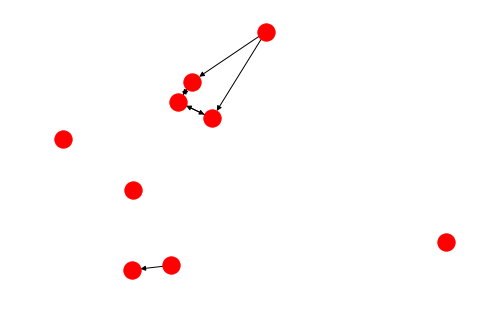

In [24]:
nx.draw(scaffold.graph)

In [21]:
scaffold = Scaffold()
scaffold.add_brick(Spike_Input(np.array([1,0,1,1]), coding='Raster', name='Input0'), 'input')
scaffold.add_brick(XOR(name='xor'), [0], output=True)
scaffold.lay_bricks()
result = scaffold.evaluate(backend='ds', max_runtime =9, record_all=True)
print(result)

{0: [0, 2, 3, 4, 6], 1: [], 2: [5, 6], 3: [6], 4: [6], 5: [6], 6: [6], 7: [6], 8: [6]}
